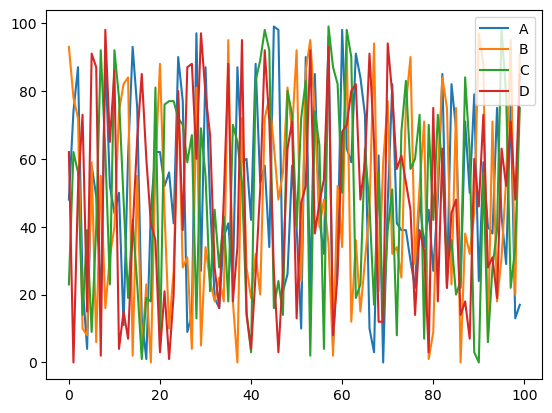

In [1]:
import q1 

q1.char1()